# Yelp Data Challenge - Data Preprocessing

This is an attempt to build a basic recommendation system for restaurants in Las Vegas. We will explore using collaborative filtering and matrix factorization methods.

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    1111 unique cities from all across the globe. This project will work with Las Vegas.
    It is a popular destination, and there are ample entries in this data set.

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'yelp_dataset/yelp_academic_dataset_business.json',
    'yelp_dataset/yelp_academic_dataset_checkin.json',
    'yelp_dataset/yelp_academic_dataset_review.json',
    'yelp_dataset/yelp_academic_dataset_tip.json',
    'yelp_dataset/yelp_academic_dataset_user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV


In [5]:
# There are various names that refer to Las Vegas, with various mixes of cases and spaces
# Let's standardize all relevant names to "Las Vegas"
# Ignore 'las vegas & henderson', 'las vegas east'

for city in df_business.city.unique():
    if city.lower()[:3] == 'las':
        print(city)
        
print("Entries actually named 'Las Vegas': {}".format( (df_business.city=="Las Vegas").sum() ))

Las Vegas
las vegas
Lasalle
LaSalle
las Vegas
Las  Vegas
Las vegas
Las Vegass
LasVegas
Las Vegas East
Las Vegas,
Las Vegas Nv
Las Vegas & Henderson
Las Vegas, NV
Las Vegas Nevada
Entries actually named 'Las Vegas': 28865


In [6]:
# Carry out replacement

valid_city_names = ["las vegas", "las  vegas", "las vegas east",
                    "las vegass", "lasvegas", "las vegas,", "las vegas nv",
                    "las vegas, nv", "las vegas nevada"]

def fix_city_name(name, names_to_replace, key=None):
    ''' Replace names_to_replace with key '''
    if name in names_to_replace:
        return key
    else:
        return name

standardized_city_name = df_business.city.apply(fix_city_name, args=(valid_city_names, "Las Vegas"))

In [7]:
# Verify that there are ample entries on Las Vegas
# So we have fixed around a few dozens of entries...alright.

df_business.city = standardized_city_name
print("# of Entries now named 'Las Vegas': {}".format( (standardized_city_name=="Las Vegas").sum() ))

# of Entries now named 'Las Vegas': 28902


In [8]:
# Small amounts of NAs observed; will impute when necessary
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


#### Checkin Data

In [ ]:
# with open(file_checkin) as f:
#     df_checkin = pd.DataFrame(json.loads(line) for line in f)
# df_checkin.head(2)

#### Review Data
30 secs loading time on a MBP with 16GB of RAM. Use distributed Spark whenever possible.

In [9]:
# with open(file_review) as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
# df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g


#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category
Extract all entries from `df_business` pertaining to "Restaurants" in "Las Vegas". 

Although the 'categories' feature consists of long, unformatted strings, it suffices to perform a str.match("Restaurants") to identify all restaurants.

In [10]:
# Impute missing categories as 'Unknown'
df_business["categories"].replace(np.nan, "Unknown", inplace=True)

# Create the necessary filters (boolean mask) 
lv_mask = (df_business["city"]== 'Las Vegas') & (df_business["categories"].str.match("Restaurants"))

In [11]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business.loc[lv_mask, :]

In [35]:
df_filtered.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

#### Keep only relevant columns in `df_business` 
Which features are useful for building a recommendation system?
    * business_id --- for computers to uniquely identifying each restaurant (branch)
    * name --- for us humans to identify restaurant 
    * categories --- more human-readable information for understanding the restaurant
    * stars --- the average star rating given to each restaurant
    * attributes --- more text attributes describing each restaurant in detail

In [ ]:
# Print column names to verify
# df_filtered.columns

In [36]:
selected_features = [u'business_id', u'name', u'categories', u'stars', u'attributes']

In [37]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered.loc[:, selected_features]

In [38]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(axis="columns", mapper={"stars": "avg_stars"}, inplace=True)

In [39]:
# Inspect your DataFrame
df_selected_business.head()

,business_id,name,categories,avg_stars,attributes
143,2kWrSFkIes_d2BMg4YrRtA,Pizza Hut,"Restaurants, Pizza",2.5,"{'Alcohol': 'none', 'Ambience': '{'romantic': ..."
197,YV9GVfmDSDM7HSV0jVdTOA,El Pollo Loco,"Restaurants, Salad, Fast Food, Mexican",3.0,"{'Alcohol': 'none', 'Ambience': '{'romantic': ..."
325,lv5Bnqlt93NnvNJ2oNcQ8Q,Los Cucos Mexican Cafe,"Restaurants, Bars, Nightlife, Caterers, Mexica...",4.0,"{'Alcohol': 'full_bar', 'Ambience': '{'romanti..."
630,DbK9fyJq4O4zfT1jv6JOhw,Pam Real Thai Las Vegas,"Restaurants, Food, Food Delivery Services, Thai",4.0,"{'Alcohol': 'none', 'Ambience': '{'romantic': ..."
1061,Kx0MUrNQ737s-VVElk6Vig,Las Delicias De Las Vegas,"Restaurants, Mexican",4.0,"{'Alcohol': 'none', 'Ambience': '{'romantic': ..."


#### Save results to csv files

In [44]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv("data/selected_business.csv")

In [ ]:
# Try reload the csv file to check if everything works fine
# pd.read_csv("data/selected_business.csv").tail()

### Use the "business_id" column to filter review data

* We want to make a DataFrame that only contain reviews about the business entities we just obtained

#### Load review dataset

In [ ]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

#### Prepare dataframes to be joined, - on business_id

In [46]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index(['business_id'])

In [47]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index(["business_id"])

#### Join! and reset index

In [48]:
# Confirm that there are no NAs among review dataset
pd.DataFrame.sum(df_right.isna())

cool         0
date         0
funny        0
review_id    0
stars        0
text         0
useful       0
user_id      0
dtype: int64

In [49]:
# Join df_left and df_right. 
# Using inner join, because we only want restaurants with reviews attached to them
df_lv_joined = df_left.join(df_right, on="business_id", how="inner")

# Reset index; return DataFrame to normal
df_lv_joined = df_lv_joined.reset_index()

#### Furthermore, filter data by date

Keep reviews from the **most recent two years** (approximately), to ensure relevance of recommendations. Also, it helps with saving RAM on a puny laptop :)

In [51]:
# The latest review in the data was made on 2018-07-02
df_lv_joined.date.max()

'2018-07-02'

In [52]:
# Make a filter that selects date after 2016-04-30; 
date_mask = (df_lv_joined.date > '2016-04-30')

# Filter the joined DataFrame and name it as df_final
df_lv_joined = df_lv_joined.loc[date_mask, :]

## Basic EDA on processed data
Each row of `df_lv_joined` contains a review, and data about the restaurant reviewed. We can explore the data, and obtain insights for our recommendation system, or simply interesting behaviorial patterns among users.

In [54]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Text(0, 0.5, "Number of 'useful' votes")

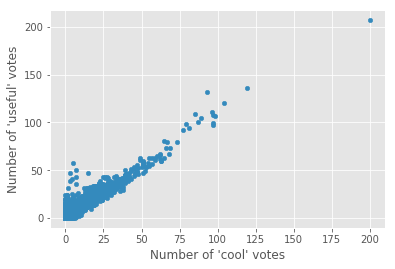

In [71]:
# Obvious, almost-linear correlation between the numbers of "useful" and "cool" tags per review
# Front-end product question: is one of the tags redundant?
# In any case, can pick EITHER ONE to weigh the importance of each review when building recommendation system!

df_lv_joined.plot.scatter(x="cool", y="useful")
plt.xlabel("Number of 'cool' votes")
plt.ylabel("Number of 'useful' votes")

          useful     stars
useful  1.000000 -0.031587
stars  -0.031587  1.000000


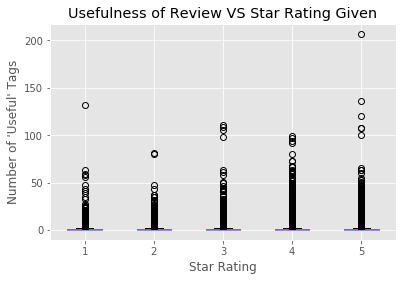

In [68]:
# Weak between usefulness of reviews and star rating given to restaurant
df_lv_joined.boxplot(by="stars", column="useful")
plt.title("Usefulness of Review VS Star Rating Given")
plt.suptitle("")
plt.xlabel("Star Rating")
plt.ylabel("Number of 'Useful' Tags") 

# Confirm weak correlation
print(df_lv_joined.loc[:, ["useful", "stars"]].corr())

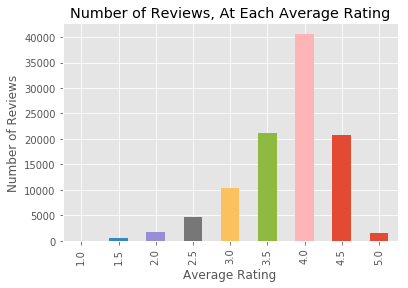

In [69]:
# Are the reviews concentrated in certain (average) ratings? Yes!
# Possible implication: people don't bother to leave reviews for really bad restaurants
# Not sure why so few reviews give 5.0 though; maybe perfect restaurants are hard to find ;)

reviews_per_star = df_lv_joined['avg_stars'].value_counts()
reviews_per_star = reviews_per_star.sort_index()

plt.title("Number of Reviews, At Each Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Number of Reviews")
reviews_per_star.plot.bar()

## Save preprocessed dataset to CSV file

* Provides starting point for actual modeling / recommendation-making

In [70]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_lv_joined.to_csv("data/last_2_years_restaurant_reviews.csv", index=False)